# Data-X Spring 2019: Homework 05

### Linear regression & Logistic regression



## Name: Shrey Samdani

## SID: 3032000414




In this homework, you will do some exercises on prediction using sklearn. 

REMEMBER TO DISPLAY ALL OUTPUTS. If the question asks you to do something, make sure to print your results.


## Part 1 - Regression


### Data:
__Data Source__:
Data file is uploaded to bCourses and is named: __Energy.csv__ 
(Link in the Assignment details page on Bcourses) 

The dataset was created by Angeliki Xifara ( Civil/Structural Engineer) and was processed by Athanasios Tsanas, Oxford Centre for Industrial and Applied Mathematics, University of Oxford, UK).

__Data Description__:

The dataset contains eight attributes of a building (or features, denoted by X1...X8) and response being the heating load on the building, y1. 

* X1	Relative Compactness 
* X2	Surface Area 
* X3	Wall Area 
*  X4	Roof Area 
*  X5	Overall Height 
* X6	Orientation 
*  X7	Glazing Area 
*  X8	Glazing Area Distribution 
*  y1	Heating Load 


#### Q1.1
Read the data file from the csv.

Print the count of NaN values for each attribute in the dataset.

Print the Range (min, max) and percentiles (25th, 50th, and 75th) of each attribute in the dataset

In [11]:
import numpy as np
import pandas as pd

energy = pd.read_csv("energy.csv")
print("# of NaN values:", energy.isnull().sum().sum())
energy.describe()



# of NaN values: 0


,X1,X2,X3,X4,X5,X6,X7,X8,Y1
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000


 __REGRESSION__:

Using the data, we want to predict "Heating load". The output variable is continuous. Hence, we need to use a regression algorithm.  

__Q 1.2:__ 

Split the dataset randomly into train and test. Train a **Linear Regression** model on 80% of the data (80-20 split).
What is the intercept and coefficient values?



In [12]:
from sklearn.model_selection import train_test_split

X = energy.iloc[:,:-1]
Y = energy['Y1']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)


from sklearn import linear_model

linearModel = linear_model.LinearRegression()
linearModel.fit(x_train, y_train)
print("Intercept:",linearModel.intercept_)
print("Coefficients:", linearModel.coef_)

Intercept: 73.63857288273616
Coefficients: [-5.79848476e+01 -1.39460642e+11  1.39460642e+11  2.78921284e+11
  4.13473804e+00 -2.13875247e-02  1.98411253e+01  2.32395440e-01]



#### Q.1.3: 

Create a function which takes arrays of prediction and actual values of the output as parameters to calculate **'Root Mean Square error'** (RMSE) metric:  

1. Use the function to calculate the training RMSE  
2. Use the function to calculate the test RMSE



In [13]:
# your code
rmseCalc = lambda pred, actual: np.mean((pred-actual)**2)**0.5

print("TRAINING RMSE:", rmseCalc(linearModel.predict(x_train), y_train))
print("TEST RMSE:", rmseCalc(linearModel.predict(x_test), y_test))


TRAINING RMSE: 2.892919795496745
TEST RMSE: 3.03337797694144



#### Q1.4: 

Let's see the effect of amount of data on the performance of prediction model. Use varying amounts of data (100,200,300,400,500,all) from the training data you used previously to train different regression models. Report  training error and test error in each case. Test data  is the same as above for  all  these cases.

**Plot error rates vs number of training examples.** Both the training error and the test error should be plotted. Comment on the relationship you observe between the amount of data used to train the model and the test accuracy of the model.

__Hint:__ Use array indexing to choose varying data amounts

SIZE: 100
TRAINING ACCURACY: 0.9244997008930089
TEST ACCURACY: 0.9131949482613633

SIZE: 200
TRAINING ACCURACY: 0.9113355114015416
TEST ACCURACY: 0.9069831120301527

SIZE: 300
TRAINING ACCURACY: 0.922842847741354
TEST ACCURACY: 0.9067987723998217

SIZE: 400
TRAINING ACCURACY: 0.9225682273925364
TEST ACCURACY: 0.9066138628588658

SIZE: 500
TRAINING ACCURACY: 0.9214084886642311
TEST ACCURACY: 0.9064240862216149

SIZE: 614
TRAINING ACCURACY: 0.9184933052813427
TEST ACCURACY: 0.9057492207192306



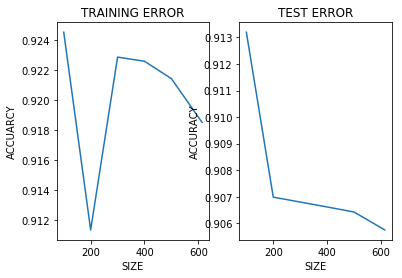

In [14]:
import matplotlib.pyplot as plt

train_sizes = [100,200,300,400,500, len(x_train)]
train_error, test_error = [], []

for size in train_sizes:
    linearModel = linear_model.LinearRegression()
    linearModel.fit(x_train.iloc[:size,:], y_train.iloc[:size])
    train_error.append(linearModel.score(x_train.iloc[:size,:], y_train.iloc[:size]))
    test_error.append(linearModel.score(x_test.iloc[:size,:], y_test.iloc[:size]))
    
    print("SIZE:",size)
    print("TRAINING ACCURACY:",train_error[-1])
    print("TEST ACCURACY:",test_error[-1])
    print()
 
plt.subplot(1, 2, 1)
plt.plot(train_sizes, train_error)
plt.title("TRAINING ERROR")
plt.xlabel("SIZE")
plt.ylabel("ACCUARCY")

plt.subplot(1, 2, 2)
plt.plot(train_sizes, test_error)
plt.title("TEST ERROR")
plt.xlabel("SIZE")
plt.ylabel("ACCURACY")

plt.show()
    
    

It seems as the size increases, the accuracy goes down after a certain point, which could be explained by overfitting.

## Part 2 - Classification


__CLASSIFICATION__:
LABELS ARE DISCRETE VALUES.

Here the model is trained to classify each instance into a set of predefined discrete classes. On inputting a feature vector into the model, the trained model is able to predict a class of that instance.


#### Q2.1
Bucket the values of 'y1' i.e 'Heating Load'  from the original dataset into 3 classes:

0: 'Low' ( < 14),   
1: 'Medium'  (14-28),   
2: 'High'  (>28)

**HINT:** Use pandas.cut

This converts the given dataset  into a classification problem. Use this dataset with transformed 'heating load' to create a **logistic regression** classifiction model that predicts heating load type of a building. Split the data randomly into training and test set. Train the model on 80% of the data (80-20 split).


In [5]:
bins = pd.IntervalIndex.from_tuples([(0, 1), (2, 3), (4, 5)])
energy['Y_class'] = energy['Y1']
Y = energy['Y_class']
Y[Y < 14] = 0
Y[(Y >= 14) & (Y<=28)] = 1
Y[Y > 28] = 2

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
linearModel = linear_model.LogisticRegression()
linearModel.fit(x_train, y_train)



/Users/shreysamdani/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/shreysamdani/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/shreysamdani/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/shreysamdani/anaconda3/lib/python3.7/site-packages/sk

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

#### Q2.2 
- Print the training and test accuracies
- Print the confusion matrix
- Print the precision and recall numbers for all the classes


In [6]:
# your code
print("TRAINING ACCURACY:", linearModel.score(x_train, y_train))
print("TEST ACCURACY:", linearModel.score(x_test, y_test))

from sklearn.metrics import *
predicted = linearModel.predict(x_test)
print("CONFUSION MATRIX:",confusion_matrix(predicted,y_test))
print("PRECISION NUMBERS:", precision_score(predicted,y_test, average = None))
print("RECALL NUMBERS:", recall_score(predicted,y_test, average = None))


TRAINING ACCURACY: 0.7947882736156352
TEST ACCURACY: 0.7467532467532467
CONFUSION MATRIX: [[44 18  0]
 [ 2 24  0]
 [ 0 19 47]]
PRECISION NUMBERS: [0.95652174 0.39344262 1.        ]
RECALL NUMBERS: [0.70967742 0.92307692 0.71212121]


#### Q2.3
##### K Fold Cross Validation

 In k-fold cross-validation, the shuffled training data is partitioned into k disjoint sets and the model is trained on k −1 sets and validated on the kth set. This process is repeated k times with each set chosen as the validation set once. The cross-validation accuracy is reported as the average accuracy of the k iterations
 
__Use 7-fold cross validation on the training data. Print the average accuracy__

In [7]:
# your code
from sklearn.model_selection import cross_val_score

linearModel = linear_model.LogisticRegression()
print("AVERAGE ACCURACY:",cross_val_score(linearModel,x_train,y_train).mean())

AVERAGE ACCURACY: 0.7636857275837573


/Users/shreysamdani/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/shreysamdani/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/shreysamdani/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/shreysamdani/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/shr

__Q2.4__

One of the preprocessing steps in Data science is Feature Scaling i.e getting all our data on the same scale by setting same  Min-Max of feature values. 
This makes training less sensitive to the scale of features . 
Scaling is important in algorithms that use distance functions as a part of classification. If we Scale features in the range [0,1] it is called unity based normalization.

__Perform unity based normalization on the above dataset and train the model again, compare model performance in training and validation with your previous model.__  

refer:http://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-scaler  
more at: https://en.wikipedia.org/wiki/Feature_scaling

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)

x_train, x_test, y_train, y_test = train_test_split(scaler.transform(X), Y, test_size=0.2)
linearModel = linear_model.LogisticRegression()
linearModel.fit(x_train, y_train)

print("TRAINING ACCURACY:", linearModel.score(x_train, y_train))
print("TEST ACCURACY:", linearModel.score(x_test, y_test))

TRAINING ACCURACY: 0.8241042345276873
TEST ACCURACY: 0.8181818181818182


/Users/shreysamdani/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/shreysamdani/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/shreysamdani/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


The model performance is very similar in training and validation with the previous model.